#**FINAL PROJECT SANBERCODE MACHINE LEARNING & PUBLIC OPINION ANALYSIS**

#Bussiness Understanding


*   Topik yang dipilih adalah mengenai wacana penerapan Electronic Road Pricing (ERP) di Jakarta
*   Hal yang ingin dipelajari adalah bagaimana respon masyarakat terhadap wacana penerapan ERP dan topik-topik yang terkait dengan wacana penerapan ERP ini



#Data Understanding

Data yang akan digunakan adalah data tweet selama 7 hari ke belakang (15-22 Januari 2023) dengan keyword "ERP Jakarta" dari Twitter yang diambil dengan Twitter API. Dari data ini, akan dianalisis sentimen publik terhadap wacana penerapan ERP di Jakarta ini dan topik-topik yang terkait. Selain itu, juga akan digunakan data dari salah satu artikel yang membahas mengenai topik ini di Kompas.com

#Data Collection
Pada bagian pertama, kita akan membuat dataset yang terdiri dari tweet-tweet menggunakan Tweepy dengan nama "erp_tweet.csv"

In [ ]:
import pandas as pd
import json, requests
from requests_oauthlib import OAuth1
import tweepy

In [ ]:
with open("token.json")as f:
  tokens = json.load(f)

bearer_token = tokens['bearer_token']
api_key = tokens['api_key']
api_key_secret = tokens['api_key_secret']
access_token = tokens['access_token']
access_token_secret = tokens['access_token_secret']

In [ ]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api_1 = tweepy.API(auth, wait_on_rate_limit = True)

query = 'ERP Jakarta -filter:retweets'
since_date = '2023-01-15'
until_date = '2023-01-22'

response = tweepy.Cursor(api_1.search,
                         q = query,
                         lang = 'id',
                         since = since_date,
                         until = until_date,
                         tweet_mode = "extended",
                         ).items()

temp = []

for tweet in response:
  temp.append(tweet.full_text)

df_tweets = pd.DataFrame(temp, columns=['tweet'])
df_tweets

,tweet
0,Wacana jalan berbayar atau electronic road pri...
1,ERP electronic road pricing ... Ada lah cara m...
2,"*Akan Semakin Membebani Masyarakat, PKS Tolak ..."
3,ERP sebenarnya bagus tapi belum waktunya diter...
4,@yudistirafind @arifgun4 @03___nakula Kinerja ...
...,...
285,"Namun, lanjut Taufik, terdapat sejumlah catata..."
286,Sanksi yang dikenakan sebesar 10 kali lipat da...
287,INFOGRAFIS: Daftar Nama Jalan di Jakarta yang ...
288,Brdsrkn Raperda PLLE akn ada 25 ruas jln biasa...


In [ ]:
df_tweets.to_csv("erp_tweet.csv")

Pada bagian ini, kita akan membuat dataset dari sebuah artikel di Kompas.com yang membahas mengenai ERP di Jakarta

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

alamat = 'https://megapolitan.kompas.com/read/2023/01/18/11000041/tepis-penolak-kebijakan-erp-pakar-sebaik-apa-pun-angkutan-umum-tidak-akan'
html = urlopen(alamat)
data =  BeautifulSoup(html, 'html.parser')

titles = data.findAll("div", class_="read__content")[0]
rows = titles.findAll("p")

temp = []

for row in rows:
    temp.append(row.get_text())
text = pd.DataFrame(temp)
text.columns = ['kalimat']

In [ ]:
text = text.drop(index = [0, 9, 11])
text = text.reset_index(drop = True)
text.to_csv("berita.csv")
text

,kalimat
0,"JAKARTA, KOMPAS.com - Ketua Bidang Advokasi da..."
1,"Kendati demikian, Djoko tidak memungkiri bahwa..."
2,"""Namun, sebaik apa pun angkutan umumnya, sebut..."
3,Baca juga: Berdesakan di Dalam Bus Transjakart...
4,"Menurut Djoko, masih banyak masyarakat yang me..."
5,"""Dengan ERP, masyarakat dipaksa rasional dalam..."
6,"Menurut Djoko, ERP merupakan suatu sistem yang..."
7,ERP atau dikenal sebagai congestion charging a...
8,"""Dengan ERP, terdapat pilihan pengemudi untuk ..."


#Data Preprocessing

Pada bagian ini, kita akan membersihkan dan merapikan data yang ada

In [ ]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 5.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt

dwlr = nltk.downloader.Downloader()

for pkg in dwlr.corpora():
    dwlr._status_cache[pkg.id] = 'installed'

dwlr.download('popular')
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('stopwords')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
#membaca file csv untuk tweet dan artikel kompas.com

tweet  = pd.read_csv("erp_tweet.csv")
text = pd.read_csv("berita.csv")

In [ ]:
tweet

,Unnamed: 0,tweet
0,0,Wacana jalan berbayar atau electronic road pri...
1,1,ERP electronic road pricing ... Ada lah cara m...
2,2,"*Akan Semakin Membebani Masyarakat, PKS Tolak ..."
3,3,ERP sebenarnya bagus tapi belum waktunya diter...
4,4,@yudistirafind @arifgun4 @03___nakula Kinerja ...
...,...,...
285,285,"Namun, lanjut Taufik, terdapat sejumlah catata..."
286,286,Sanksi yang dikenakan sebesar 10 kali lipat da...
287,287,INFOGRAFIS: Daftar Nama Jalan di Jakarta yang ...
288,288,Brdsrkn Raperda PLLE akn ada 25 ruas jln biasa...


In [ ]:
text

,Unnamed: 0,kalimat
0,0,"JAKARTA, KOMPAS.com - Ketua Bidang Advokasi da..."
1,1,"Kendati demikian, Djoko tidak memungkiri bahwa..."
2,2,"""Namun, sebaik apa pun angkutan umumnya, sebut..."
3,3,Baca juga: Berdesakan di Dalam Bus Transjakart...
4,4,"Menurut Djoko, masih banyak masyarakat yang me..."
5,5,"""Dengan ERP, masyarakat dipaksa rasional dalam..."
6,6,"Menurut Djoko, ERP merupakan suatu sistem yang..."
7,7,ERP atau dikenal sebagai congestion charging a...
8,8,"""Dengan ERP, terdapat pilihan pengemudi untuk ..."


In [ ]:
#membuat function untuk text preprocessing

def case_folding(x):
  y = x.lower()
  y = re.sub(r"\d+", "", y)
  y = y.translate(str.maketrans("","",string.punctuation))
  y = y.strip()
  return y

def stop_words(x):
    query = x
    stop = stopwords.words('indonesian')
    stop.append('erp')
    stop.append('jakarta')
    stop.append('electronic')
    stop.append('road')
    stop.append('pricing')
    stop.append('dki')
    stop.append('pemprov')
    querywords = query.split()

    resultwords  = [word for word in querywords if word not in stop]
    result = ' '.join(resultwords)
    return result

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(x):
  hasil = stemmer.stem(x)
  return hasil

In [ ]:
tweet['clean'] = tweet['tweet']

for i in range(len(tweet)):
  tweet['clean'][i] = case_folding(tweet['clean'][i])
  tweet['clean'][i] = stop_words(tweet['clean'][i])
  tweet['clean'][i] = stemming(tweet['clean'][i])

#tampilkan
tweet

<ipython-input-18-356f80d4c711>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['clean'][i] = case_folding(tweet['clean'][i])
<ipython-input-18-356f80d4c711>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['clean'][i] = stop_words(tweet['clean'][i])
<ipython-input-18-356f80d4c711>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['clean'][i] = stemming(tweet['clean'][i])


,Unnamed: 0,tweet,clean
0,0,Wacana jalan berbayar atau electronic road pri...,wacana jalan bayar jalan perhati dewan wakil r...
1,1,ERP electronic road pricing ... Ada lah cara m...,sterilisasi warga nggak paspasan gubernur give...
2,2,"*Akan Semakin Membebani Masyarakat, PKS Tolak ...",beban masyarakat pks tolak bahas terap httpstc...
3,3,ERP sebenarnya bagus tapi belum waktunya diter...,bagus terap singapur pake jalan menit ketemu t...
4,4,@yudistirafind @arifgun4 @03___nakula Kinerja ...,yudistirafind arifgun nakula kerja nye bisnis ...
...,...,...,...
285,285,"Namun, lanjut Taufik, terdapat sejumlah catata...",taufik catat perintah provinsi terap httpstcom...
286,286,Sanksi yang dikenakan sebesar 10 kali lipat da...,sanksi kena kali lipat besar nilai tarif tingg...
287,287,INFOGRAFIS: Daftar Nama Jalan di Jakarta yang ...,infografis daftar nama jalan terap httpstcoxzv...
288,288,Brdsrkn Raperda PLLE akn ada 25 ruas jln biasa...,brdsrkn raperda plle akn ruas jln bayar scr el...


#Text Processing and Analysis

Melakukan processing dan analisis dari data yang ada. Dimulai dari data tweet.

<function matplotlib.pyplot.show(*args, **kw)>

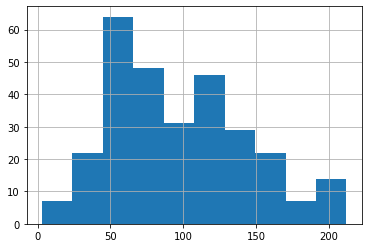

In [ ]:
#distribusi frekuensi jumlah karakter per data
tweet['clean'].str.len().hist()
plt.show

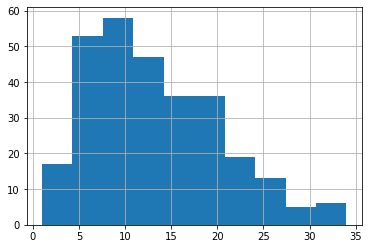

In [ ]:
#distribusi frekuensi jumlah kata per data
tweet['clean'].str.split().map(lambda x: len(x)).hist()
plt.show()

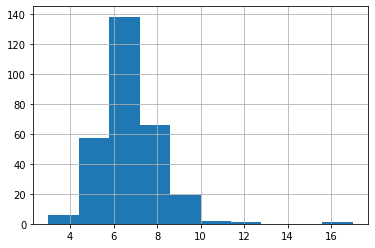

In [ ]:
#Distribusi Frekuensi Panjang Kata Rata-Rata Pada Data
tweet['clean'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.show()

<FreqDist with 1353 samples and 3808 outcomes>
[('jalan', 176), ('terap', 134), ('bayar', 121), ('bijak', 52), ('rencana', 51), ('macet', 46), ('kendara', 46), ('rp', 45), ('motor', 43), ('tarif', 43), ('transportasi', 37), ('elektronik', 34), ('kena', 32), ('ruas', 28), ('kurang', 25), ('indonesia', 25), ('sistem', 25), ('laku', 21), ('dprd', 21), ('miliar', 21)]


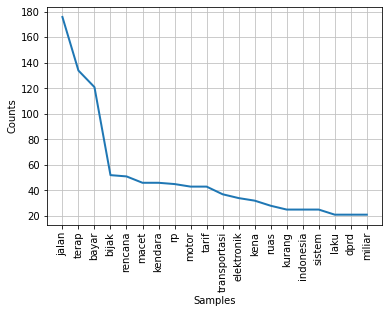

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

#Distribusi Frekuensi Kata
tweet['clean'] = tweet['clean'].apply(lambda x: word_tokenize(str(x)))
tweets = [word for x in tweet['clean'] for word in x]
fqdist = FreqDist(tweets)

print(fqdist)

most_common_word = fqdist.most_common(20)

print(most_common_word)

fqdist.plot(20,cumulative=False)

plt.show()

In [ ]:
#Lakukan Sentiment Analysis
#masukkan hasilnya pada dataframe dengan nama kolom "sentiment"

with open("./kata_positif.txt","r") as positif_file :
  positive_words = list(set(positif_file.readlines()))
with open("./kata_negatif.txt","r") as negative_file :
  negative_words = list(set(negative_file.readlines()))

In [ ]:
hasil = []

for x in tweet['tweet']:

    tweet_clean = x.strip().split()

    good_count = 0
    bad_count = 0

    for good_word in positive_words:
        count = tweet_clean.count(good_word.strip().lower())
        if count > 0:
          good_count += count

    for bad_word in negative_words:
        count = tweet_clean.count(bad_word.strip().lower())
        if count > 0:
          bad_count += count

    hasil.append(good_count - bad_count)

In [ ]:
sentiments = ["positif" if sentimen > 0 else ("netral" if sentimen == 0 else "negatif") for sentimen in hasil]
tweet["sentiment"] = sentiments

In [ ]:
tweet

,Unnamed: 0,tweet,clean,sentiment
0,0,Wacana jalan berbayar atau electronic road pri...,"[wacana, jalan, bayar, jalan, perhati, dewan, ...",netral
1,1,ERP electronic road pricing ... Ada lah cara m...,"[sterilisasi, warga, nggak, paspasan, gubernur...",positif
2,2,"*Akan Semakin Membebani Masyarakat, PKS Tolak ...","[beban, masyarakat, pks, tolak, bahas, terap, ...",netral
3,3,ERP sebenarnya bagus tapi belum waktunya diter...,"[bagus, terap, singapur, pake, jalan, menit, k...",positif
4,4,@yudistirafind @arifgun4 @03___nakula Kinerja ...,"[yudistirafind, arifgun, nakula, kerja, nye, b...",netral
...,...,...,...,...
285,285,"Namun, lanjut Taufik, terdapat sejumlah catata...","[taufik, catat, perintah, provinsi, terap, htt...",netral
286,286,Sanksi yang dikenakan sebesar 10 kali lipat da...,"[sanksi, kena, kali, lipat, besar, nilai, tari...",negatif
287,287,INFOGRAFIS: Daftar Nama Jalan di Jakarta yang ...,"[infografis, daftar, nama, jalan, terap, https...",netral
288,288,Brdsrkn Raperda PLLE akn ada 25 ruas jln biasa...,"[brdsrkn, raperda, plle, akn, ruas, jln, bayar...",netral


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


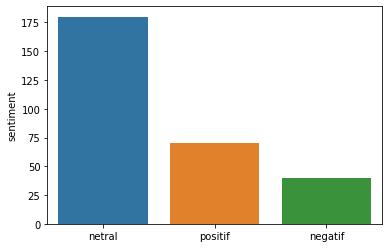

In [ ]:
import seaborn as sns

sns.barplot(tweet['sentiment'].value_counts().index,tweet['sentiment'].value_counts())

Melakukan analisis dan processing untuk data artikel.

In [ ]:
text['clean'] = text['kalimat']

for i in range(len(text)):
  text['clean'][i] = case_folding(text['clean'][i])
  text['clean'][i] = stop_words(text['clean'][i])
  text['clean'][i] = stemming(text['clean'][i])

#tampilkan
text

<ipython-input-29-4d2e85526df9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['clean'][i] = case_folding(text['clean'][i])
<ipython-input-29-4d2e85526df9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['clean'][i] = stop_words(text['clean'][i])
<ipython-input-29-4d2e85526df9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['clean'][i] = stemming(text['clean'][i])


,Unnamed: 0,kalimat,clean
0,0,"JAKARTA, KOMPAS.com - Ketua Bidang Advokasi da...",kompascom ketua bidang advokasi masyarakat mas...
1,1,"Kendati demikian, Djoko tidak memungkiri bahwa...",kendati djoko mungkir tolak terap tolak djoko ...
2,2,"""Namun, sebaik apa pun angkutan umumnya, sebut...",angkut mrt kalah nyaman mobil djoko jelas komp...
3,3,Baca juga: Berdesakan di Dalam Bus Transjakart...,baca desa bus transjakarta jam pulang kerja po...
4,4,"Menurut Djoko, masih banyak masyarakat yang me...",djoko masyarakat mobil fleksibilitas privasi g...
5,5,"""Dengan ERP, masyarakat dipaksa rasional dalam...",masyarakat paksa rasional pilih moda angkut gu...
6,6,"Menurut Djoko, ERP merupakan suatu sistem yang...",djoko sistem kembang batas kendara pribadi tur...
7,7,ERP atau dikenal sebagai congestion charging a...,kenal congestion charging metode kendali linta...
8,8,"""Dengan ERP, terdapat pilihan pengemudi untuk ...",pilih kemudi bayar nikmat jalan ubah jalan bay...


<FreqDist with 85 samples and 128 outcomes>
[('jalan', 9), ('djoko', 8), ('masyarakat', 4), ('angkut', 4), ('ubah', 4), ('transportasi', 3), ('bayar', 3), ('mobil', 3), ('guna', 3), ('minta', 3), ('kompascom', 2), ('sistem', 2), ('tolak', 2), ('door', 2), ('paksa', 2), ('pilih', 2), ('kendara', 2), ('pribadi', 2), ('tuju', 2), ('ketua', 1)]


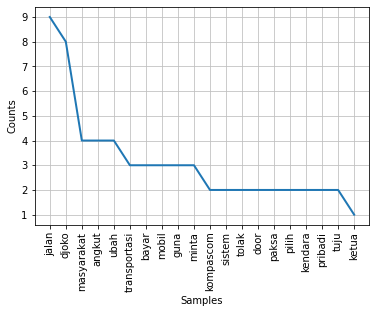

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

#Distribusi Frekuensi Kata
text['clean'] = text['clean'].apply(lambda x: word_tokenize(str(x)))
tweets = [word for x in text['clean'] for word in x]
fqdist = FreqDist(tweets)

print(fqdist)

most_common_word = fqdist.most_common(20)

print(most_common_word)

fqdist.plot(20,cumulative=False)

plt.show()

Berdasarkan data yang didapatkan, kita dapat menyimpulkan bahwa sentimen dari wacana penerapan ERP ini di Twitter adalah cenderung netral. Tetapi, jika dibandingkan antara sentimen positif dan negatif, terlihat sentimen positif yang lebih terlihat.